# Relative Strength Index


In [1]:
# import os
# import sys
# sys.path.insert(0, os.path.abspath('../'))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pprint

from utils import get_data, get_return_simulation
from strategies import rsi

plt.style.use("seaborn")


In [2]:
PATH = "../data/rsi.csv"
stocks = ["MFED.PA", "PE500.PA", "EN.PA", "CNP.PA", "TTE.PA"]
weights = [0.5, 0.4, 0.023, 0.033, 0.043]


array([[<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>]],
      dtype=object)

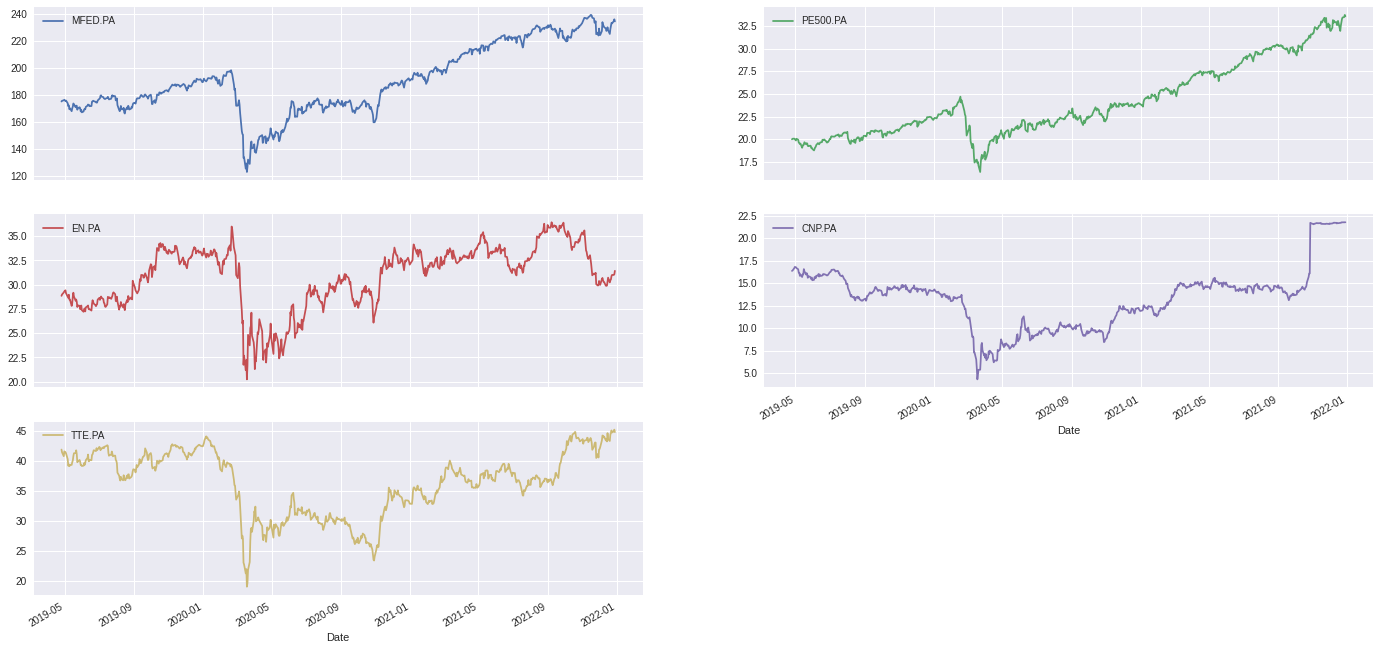

In [3]:
df = get_data(path=PATH, stocks=stocks)

df.plot(figsize=(24, 12), subplots=True, layout=(3, 2))


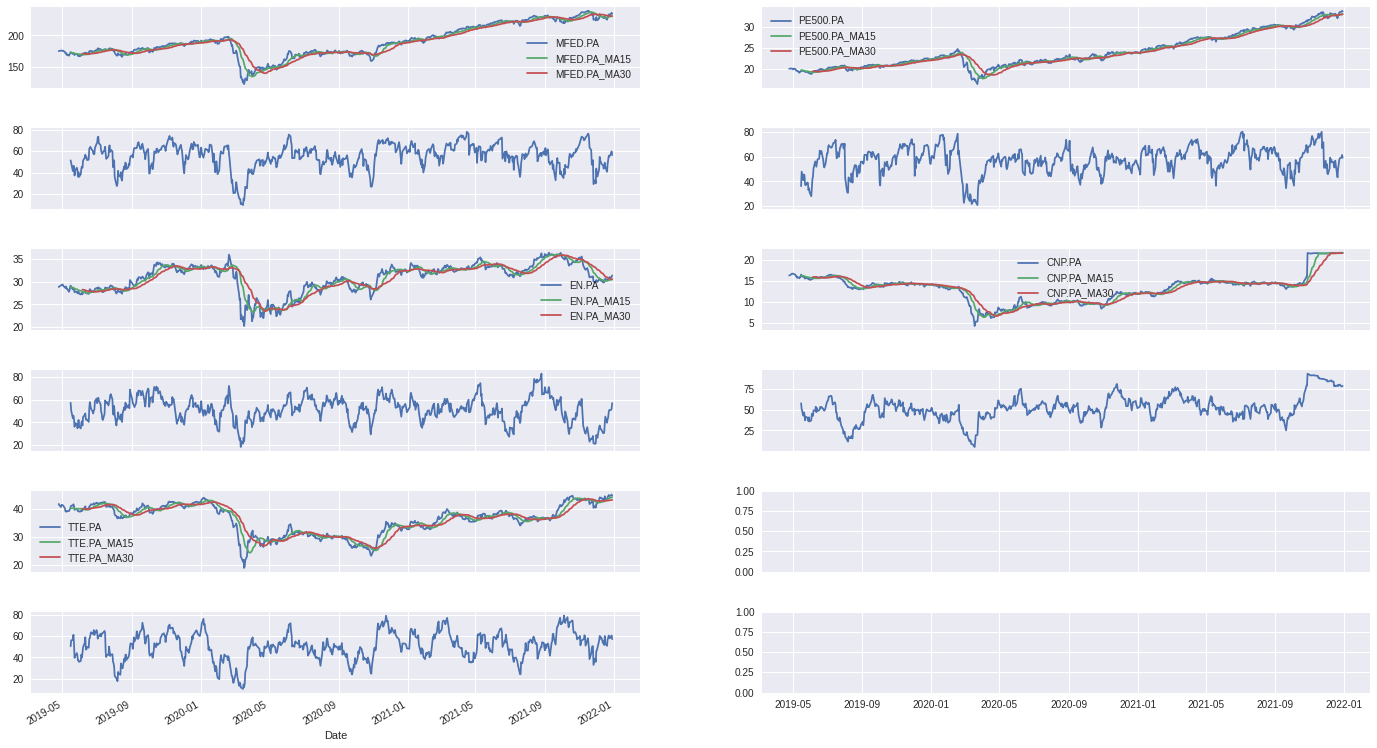

In [4]:
MA1 = 15
MA2 = 30

df = pd.concat(
    [
        df,
        df.rolling(MA1).mean().add_suffix(f"_MA{MA1}"),
        df.rolling(MA2).mean().add_suffix(f"_MA{MA2}"),
        rsi(df, stocks),
    ],
    axis=1,
)

fig, axes = plt.subplots(nrows=6, ncols=2, sharex=True)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

for i, s in enumerate(stocks):
    df[[s, f"{s}_MA{MA1}", f"{s}_MA{MA2}"]].plot(
        figsize=(24, 14), ax=axes[i // 2 * 2, i % 2]
    )
    df[f"{s}_RSI"].plot(ax=axes[i // 2 * 2 + 1, i % 2])


## Generate buy signals


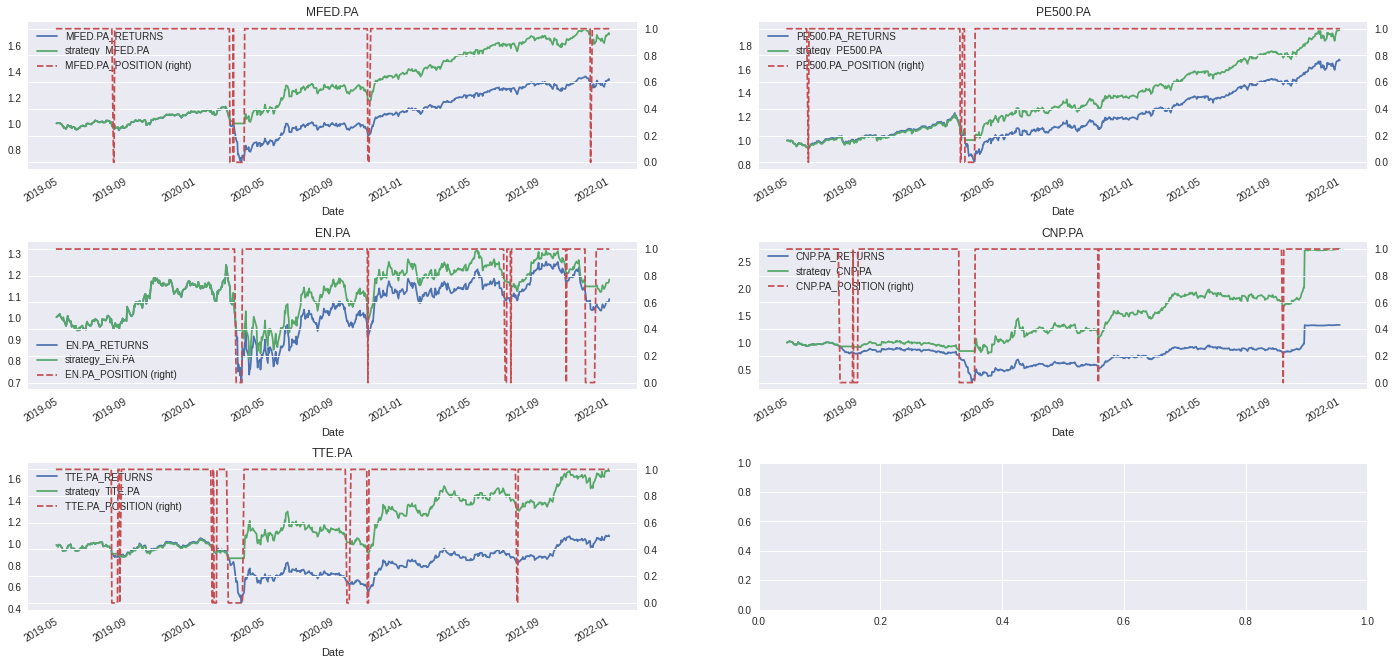

In [5]:
fig, axes = plt.subplots(nrows=3, ncols=2)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

for i, s in enumerate(stocks):
    df[f"{s}_RETURNS"] = np.log(df[s] / df[s].shift(1))
    df[f"strategy_{s}"] = df[f"{s}_POSITION"].shift(1) * df[f"{s}_RETURNS"]

    ax = (
        df[[f"{s}_RETURNS", f"strategy_{s}"]]
        .cumsum()
        .apply(np.exp)
        .plot(figsize=(24, 12), ax=axes[i // 2, i % 2])
    )
    df[[f"{s}_POSITION"]].plot(
        figsize=(24, 12), ax=ax, secondary_y=f"{s}_POSITION", style="--"
    )
    plt.title(s)


In [6]:
return_simulation = get_return_simulation(df, stocks)

market = sum(
    [w * return_simulation[s]["base returns"] for s, w in zip(stocks, weights)]
)
strategy = sum(
    [w * return_simulation[s]["strategy returns"] for s, w in zip(stocks, weights)]
)
pprint.pprint(return_simulation)
print(market)
print(strategy)


{'CNP.PA': {'amount invested': 71.44304656982422,
            'base returns': 1.3298478832602114,
            'strategy returns': 1.8274696788817566},
 'EN.PA': {'amount invested': 208.15154266357422,
           'base returns': 1.0892545643958116,
           'strategy returns': 1.0566340163499852},
 'MFED.PA': {'amount invested': 1043.5800170898438,
             'base returns': 1.338704132854512,
             'strategy returns': 1.3470936538539695},
 'PE500.PA': {'amount invested': 77.38500022888184,
              'base returns': 1.6776500701904298,
              'strategy returns': 1.734341348042584},
 'TTE.PA': {'amount invested': 306.3413333892822,
            'base returns': 1.0695176345777813,
            'strategy returns': 1.3175009931599655}}
1.4553391879189632
1.5085449906290445
